<a href="https://colab.research.google.com/github/justinm329/FARS/blob/main/Final_version_FARS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FARS Project**

---

**The main goal of the FARS project is to delve into the extensive Fatality Analysis Reporting System (FARS) dataset, aiming to comprehensively analyze and gain insights into the various facets of traffic accidents in the United States. By examining a diverse array of factors encompassing crash classifications, road conditions, vehicle attributes, and environmental elements, the project seeks to uncover underlying causes and contributing variables behind road accidents. The ultimate purpose is to inform the development of enhanced road safety measures, targeted interventions, and impactful policies geared towards minimizing accidents and their tragic outcomes. This endeavor not only fosters safer roadways for all but also equips researchers, policymakers, and transportation authorities with invaluable insights to collaboratively advance a safer and more secure transportation realm.**


| Column      | Description                                                                                       |
|-------------|---------------------------------------------------------------------------------------------------|
| fatals      | Number of fatalities in the event                                                                |
| a_ct        | Type of crash: single, two-vehicle, more than 2 vehicle                                         |
| a_ped_f     | Whether pedestrian fatality involved in crash                                                   |
| a_pedal_f   | Whether pedalcyclist fatality involved in crash                                                 |
| a_roll      | Whether vehicle rollover involved in crash                                                      |
| a_hr        | Whether hit-and-run involved in crash                                                           |
| a_polpur    | Whether police pursuit involved in crash                                                        |
| month       | Month of year when crash occurred                                                               |
| day         | Day of month when crash occurred                                                                |
| day_week    | Day of the week when crash occurred                                                             |
| hour        | Hour of the day when crash occurred                                                             |
| minute      | Minute in the hour when crash occurred                                                          |
| a_dow_type  | Day of week type: weekday (M-F) or weekend (Sat-Sun)                                           |
| a_tod_type  | Time of day time: daytime (6 am to 6 pm), nighttime (6 pm to 6 am)                             |
| state       | State in which crash occurred                                                                   |
| a_region    | Region (made up of states) where crash occurred                                                 |
| a_ru        | Rural or urban                                                                                  |
| a_inter     | Whether crash occurred on Interstate highway                                                    |
| a_intsec    | Whether crash occurred at an intersection or not                                               |
| a_roadfc    | Type of road (interstate, local, etc.)                                                          |
| a_junc      | Identifies if crash occurred in or proximity to junction or interchange area of two or more roadways |
| a_relrd     | Identifies area of roadway where crash occurred (on, off, shoulder, median, etc.)                |
| age         | Age of driver                                                                                    |
| permvit     | Number of persons in motor vehicles in-transport                                               |
| pernotmvit  | Number of persons not in motor vehicles in-transport                                           |
| a_ped       | Whether crash involved a pedestrian                                                             |
| numoccs     | Number of motor vehicle occupants                                                                |
| Vehicle-related                   |                                                                                                   |
| ve_forms    | Number of vehicle forms submitted for mv in transport                                           |
| ve_total    | Number of vehicle forms submitted                                                               |
| mod_year    | Vehicle model year                                                                               |
| a_body      | Vehicle body type (automobile, light trucks, medium/high trucks, buses, etc.)                   |
| owner       | Type of registered owner of vehicle in crash                                                    |
| deaths      | Number of fatalities in vehicle                                                                  |
| impact1     | Areas of impact - initial contact point                                                         |
| deformed    | Extent of damage to vehicle                                                                      |
| weather     | Prevailing atmospheric conditions that existed at the time of the crash                         |
| lgt_cond    | Type/level of light that existed at the time of the crash                                       |

In [52]:
!pip install scikit-optimize


In [53]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns
import json
import os
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Normalizer, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_validate
import scipy.stats as stats
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from matplotlib import markers
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from skopt import BayesSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import warnings

warnings.filterwarnings("ignore")

In [54]:
#uploading the dataset
url = "https://raw.githubusercontent.com/readytensor/rt-datasets-fars/main/data/fars_train.csv"
FARS = pd.read_csv(url)
FARS.head(3)

,u_id,fatals,a_ct,a_ped_f,a_pedal_f,a_roll,a_hr,a_polpur,month,day,...,owner,deaths,numoccs,impact1,deformed,ve_forms,ve_total,weather,lgt_cond,driver_factor
0,32083,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,10,2,...,Driver (in this crash) Was Registered Owner,1,1.0,Clockpoint 12,Disabling damage,1,1,Clear,Dark - not lighted,other
1,55073,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,6,21,...,Driver (in this crash) Not Registered Owner (o...,1,1.0,Clockpoint 1,Disabling damage,1,1,Clear,Daylight,speeding_driver_involved
2,7458,1,Single-Vehicle Crash,Other Crash,Other Crash,Other Crash,No - Hit and Run,Other Crash,7,14,...,Driver (in this crash) Was Registered Owner,0,1.0,Clockpoint 12,NaN,1,1,Clear,Daylight,other


In [55]:
# Selecting these columns
FARS = FARS[["u_id","driver_factor", "a_ct", "fatals", "a_ped_f", "a_pedal_f", "a_roll", "a_hr", "a_polpur",
                    "month", "a_dow_type", "a_tod_type", "a_region", "a_roadfc", "age", "numoccs",
                    "lgt_cond", "weather", "deformed", "deaths", "a_body", "owner", 'day', 'hour', 'minute', 've_total','mod_year']]


# **Pre-Processing**


## **Understanding the FARS dataset**

In [56]:
#Dimensions of the dataset
print("The dimensions of the FARS dataset are", FARS.shape,
      "meaning we have", FARS.shape[0], "rows and",
      FARS.shape[1], "columns in the FARS Dataset")

The dimensions of the FARS dataset are (45286, 27) meaning we have 45286 rows and 27 columns in the FARS Dataset


In [57]:
#Data types of columns in the dataset
FARS.dtypes

u_id               int64
driver_factor     object
a_ct              object
fatals             int64
a_ped_f           object
a_pedal_f         object
a_roll            object
a_hr              object
a_polpur          object
month              int64
a_dow_type        object
a_tod_type        object
a_region          object
a_roadfc          object
age                int64
numoccs          float64
lgt_cond          object
weather           object
deformed          object
deaths             int64
a_body            object
owner             object
day                int64
hour             float64
minute           float64
ve_total           int64
mod_year         float64
dtype: object

**The data type displays a dataset with several columns containing information related to vehicular accidents. These columns encompass diverse details such as unique identifiers, fatality counts, vehicle attributes, accident timing, location specifics, age, and other relevant factors. The dataset captures crucial aspects such as accident severity, vehicle types, weather conditions, and lighting, thereby offering a comprehensive overview of the contributing elements in accidents.**

In [58]:
#Getting more information about FARS dataset
#FARS.info() provides a summary of the dataset's suck as the rangeIndex, data columns, Dtype, and the count of non-null
FARS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45286 entries, 0 to 45285
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   u_id           45286 non-null  int64  
 1   driver_factor  45286 non-null  object 
 2   a_ct           45286 non-null  object 
 3   fatals         45286 non-null  int64  
 4   a_ped_f        45286 non-null  object 
 5   a_pedal_f      45286 non-null  object 
 6   a_roll         45286 non-null  object 
 7   a_hr           45286 non-null  object 
 8   a_polpur       45286 non-null  object 
 9   month          45286 non-null  int64  
 10  a_dow_type     45286 non-null  object 
 11  a_tod_type     44796 non-null  object 
 12  a_region       45286 non-null  object 
 13  a_roadfc       45286 non-null  object 
 14  age            45286 non-null  int64  
 15  numoccs        44855 non-null  float64
 16  lgt_cond       45253 non-null  object 
 17  weather        42419 non-null  object 
 18  deform

**The FARS dataset consists of 4 float64, 10 int64, and 25 object columns. This variety of data types reflects the dataset's comprehensive nature, covering both numerical and categorical information. With 45286 entries and 39 columns, it provides rich insights into various aspects of vehicular accidents, encompassing fatality details, timing, location, and vehicle characteristics. Missing values in certain columns suggest areas for data preprocessing.**

In [59]:
#FARS.describe() provides statistics such as the mean, minimum, standard deviation, and more.
FARS.describe()

,u_id,fatals,month,age,numoccs,deaths,day,hour,minute,ve_total,mod_year
count,45286.000000,45286.000000,45286.000000,45286.000000,44855.000000,45286.000000,45286.000000,44796.000000,44795.000000,45286.000000,45009.000000
mean,28338.636863,1.048161,6.708939,41.507265,1.478141,0.740913,15.683125,12.603045,28.335104,1.050987,2005.464085
std,16370.250933,0.268141,3.379152,18.031039,1.176799,0.549848,8.845668,7.378776,17.498636,0.338383,7.298116
min,0.000000,1.000000,1.000000,13.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1923.000000
25%,14148.500000,1.000000,4.000000,26.000000,1.000000,0.000000,8.000000,6.000000,14.000000,1.000000,2001.000000
50%,28380.500000,1.000000,7.000000,38.000000,1.000000,1.000000,16.000000,14.000000,29.000000,1.000000,2005.000000
75%,42532.500000,1.000000,10.000000,55.000000,2.000000,1.000000,23.000000,19.000000,44.000000,1.000000,2011.000000
max,56607.000000,20.000000,12.000000,97.000000,52.000000,18.000000,31.000000,23.000000,59.000000,21.000000,2019.000000


In [60]:
#Checking for missing data in the FARS dataset
FARS.isnull().sum()

u_id                0
driver_factor       0
a_ct                0
fatals              0
a_ped_f             0
a_pedal_f           0
a_roll              0
a_hr                0
a_polpur            0
month               0
a_dow_type          0
a_tod_type        490
a_region            0
a_roadfc            0
age                 0
numoccs           431
lgt_cond           33
weather          2867
deformed         3305
deaths              0
a_body              0
owner             258
day                 0
hour              490
minute            491
ve_total            0
mod_year          277
dtype: int64

## **Cleaning FARS dataset**


### **Dealing with Duplicates**

In [61]:
#Reviewing duplicated_rows in the FARS dataset
duplicated_rows = FARS[FARS.duplicated()]


In [62]:
FARS.duplicated().sum()

0

In [63]:
#The sum count of the duplicated values
FARS.duplicated().sum()

0

**The FARS dataset does not have any duplicate values.**




In [64]:
#grouping a_regions
new_labels = {'Alabama, Florida, Georgia, South Carolina, Tennessee': 'South_East',
             "Louisiana, Mississippi, New Mexico, Oklahoma, Texas" : 'South_Mid',
             'Arizona, California, Hawaii':'West-West',
             "Illinois, Indiana, Michigan, Minnesota, Ohio, Wisconsin":'Mid-east',
             'Delaware, District of Columbia, Kentucky, Maryland, North Carolina, Virginia, West Virginia':'Mid_East_Cost',
             "Connecticut, New Jersey, New York, Pennsylvania" : 'North_East_1',
             'Arkansas, Iowa, Kansas, Missouri, Nebraska':"AIKMN" ,
             "Alaska, Idaho, Montana, Oregon, Washington":"North_West",
             "Colorado, Nevada, North Dakota, South Dakota, Utah, Wyoming":"Mid_West",
             "Maine, Massachusetts, New Hampshire, Rhode Island, Vermont":"North_East_2",
             }

groupFARS = FARS.copy()

groupFARS['a_region'] = groupFARS['a_region'].map(new_labels)
groupFARS.a_region.unique()

array(['South_East', 'AIKMN', 'North_West', 'Mid_East_Cost', 'Mid-east',
       'South_Mid', 'North_East_1', 'West-West', 'Mid_West',
       'North_East_2'], dtype=object)

### **Handling Outliers**

In [65]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()


In [66]:
def numeric_cols(data):
  num_cols = []
  for i in data:
    if data[i].dtype == 'int' or data[i].dtype == 'float':
      num_cols.append(i)
  return num_cols

In [67]:
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols

### **Handling Missing Values**

In [68]:
## Fill in missing values
for col in numeric_cols(groupFARS):
    if groupFARS[col].dtype == np.float64 or groupFARS[col].dtype == np.int64:
        groupFARS[col].fillna(groupFARS[col].mean(), inplace=True)


#Fill missing values in numerical columns with mode
#a_tod_type,a_ru, a_inter, a_intsec, owner, impact1, deformed, weather, and lgt_cond
#categoricalColumns = ['a_tod_type', 'a_ru', 'a_inter', 'a_intsec', 'owner', 'impact1', 'deformed', 'weather', 'lgt_cond','a_junc']

for col in category_columns(groupFARS):
    if groupFARS[col].dtype == 'object':
        groupFARS[col].fillna(groupFARS[col].mode()[0], inplace=True)

In [69]:
# the numberical columns in FARS dataset
numeric_cols(groupFARS)

['u_id',
 'fatals',
 'month',
 'age',
 'numoccs',
 'deaths',
 'day',
 'hour',
 'minute',
 've_total',
 'mod_year']

In [70]:
# the category columns in the FARS dataset
category_columns(groupFARS)

['driver_factor',
 'a_ct',
 'a_ped_f',
 'a_pedal_f',
 'a_roll',
 'a_hr',
 'a_polpur',
 'a_dow_type',
 'a_tod_type',
 'a_region',
 'a_roadfc',
 'lgt_cond',
 'weather',
 'deformed',
 'a_body',
 'owner']

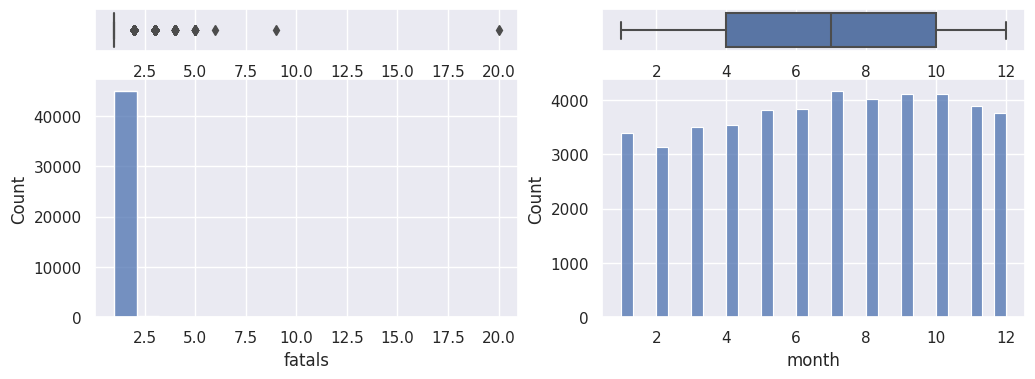

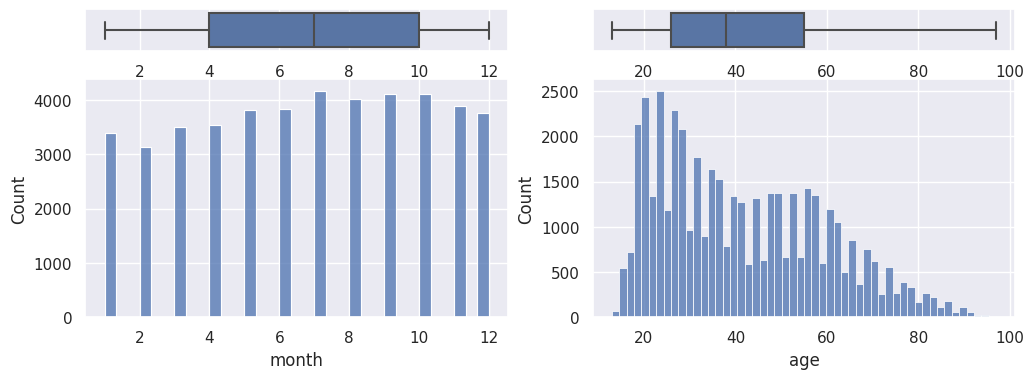

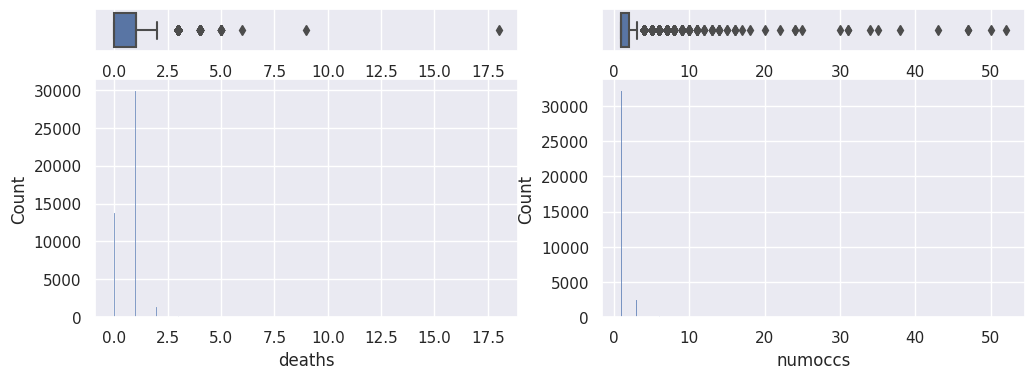

In [71]:
#Checking for outliers in the boxplots
print_box_hist(groupFARS, 'fatals', 'month')
print_box_hist(groupFARS, 'month', 'age')
print_box_hist( groupFARS, 'deaths', 'numoccs')


In [72]:
## REMOVE OUTLIERS FROM THE DATASET/ NOT ALL but some...Not sure if we are going to remove outliers based on the context of the problem

def remove_outliers(data, columns, lower_bound = 0.25, upper_bound = 0.75):
    masks = []
    for column in columns:
        q1 = data[column].quantile(lower_bound)
        q3 = data[column].quantile(upper_bound)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (data[column] >= lower) & (data[column] <= upper)
        masks.append(mask)

    # Combine the masks
    final_mask = np.all(masks, axis=0)

    # Remove outliers
    final_dataset = data[final_mask]

    return final_dataset

In [73]:
#removing outlers from "numoccs","fatals", and "deaths" columns
columns=["numoccs","fatals","deaths"]
removeOutliers= remove_outliers(groupFARS,columns)

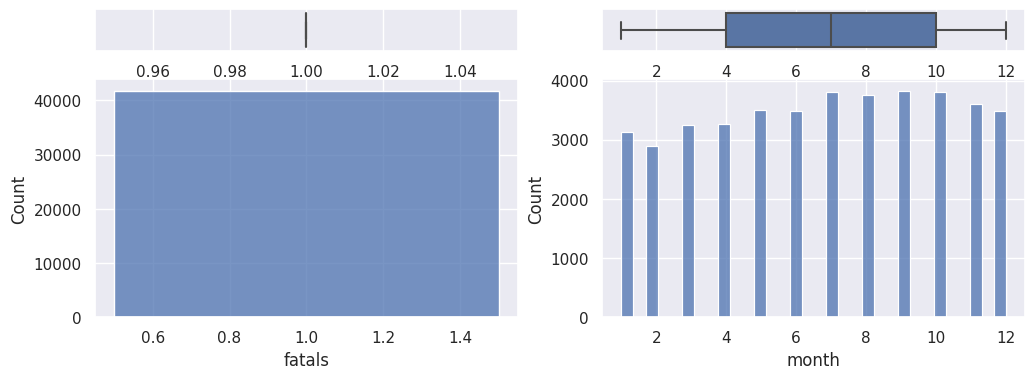

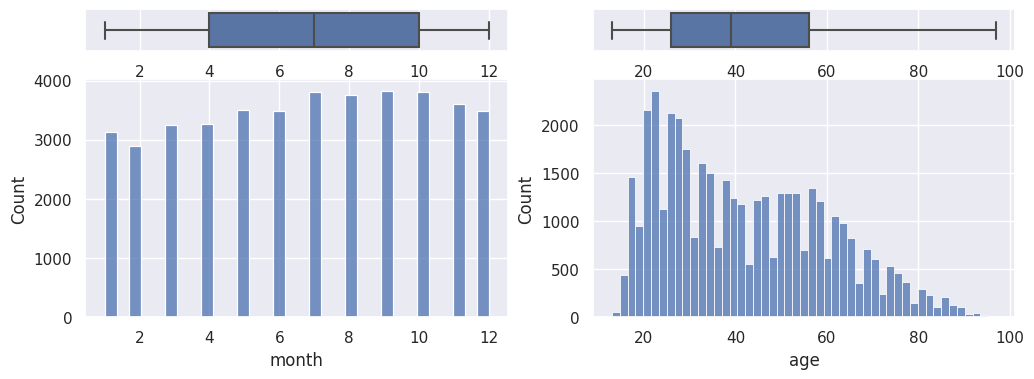

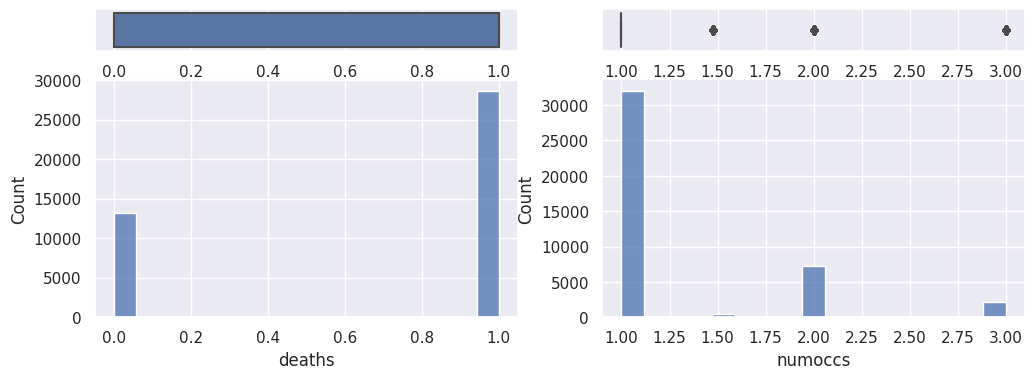

In [74]:
# making sure that the outliers are gone now
print_box_hist(removeOutliers, 'fatals', 'month')
print_box_hist(removeOutliers, 'month', 'age')
print_box_hist(removeOutliers, 'deaths', 'numoccs')

We have some values with outliers as seen by the boxplots here, we should think about removing some based on how sevier they are and the type of model we are building.

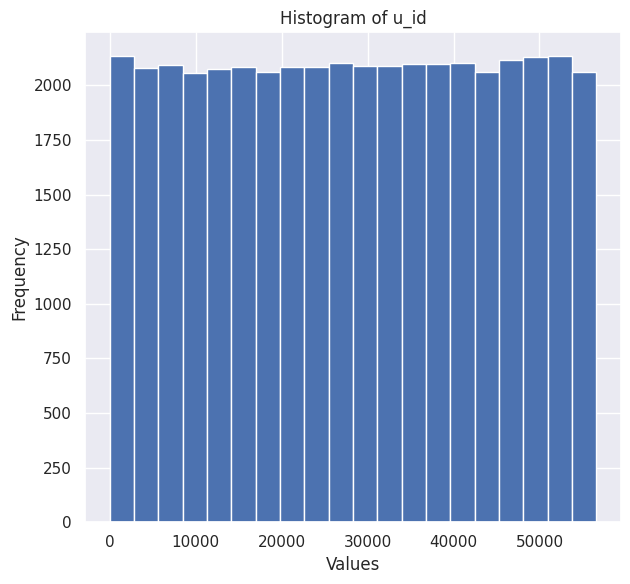

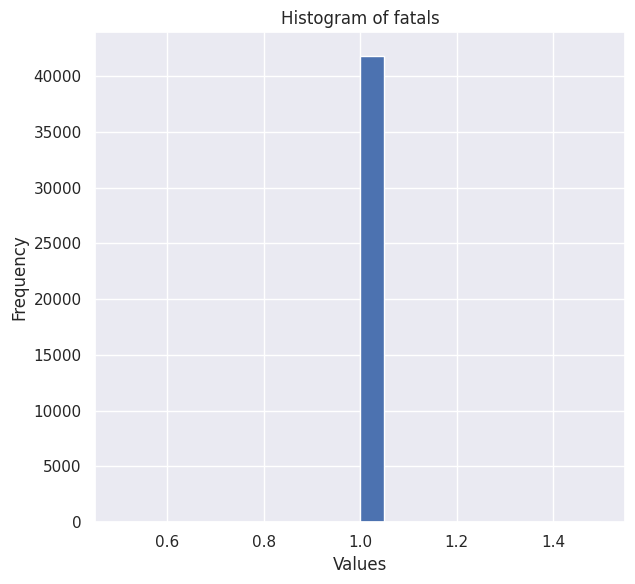

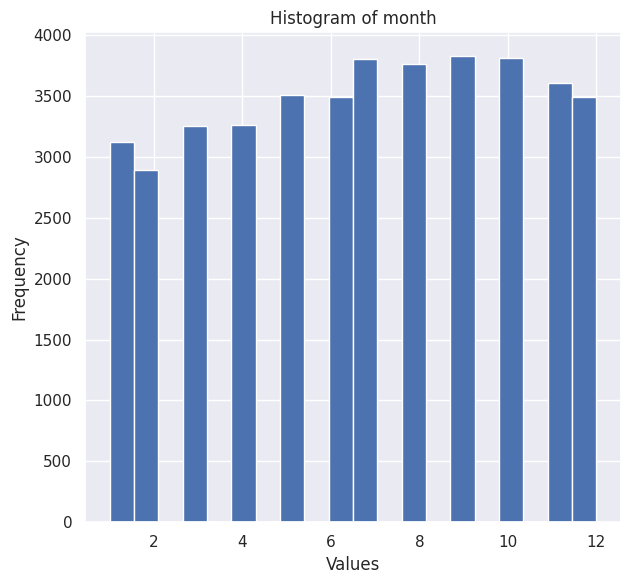

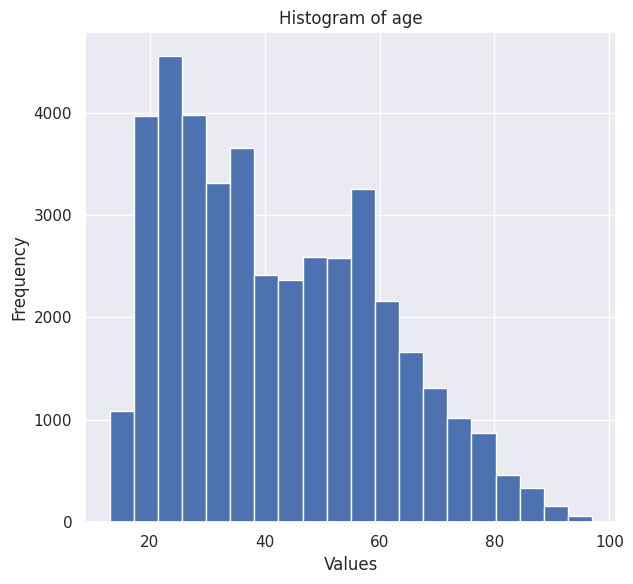

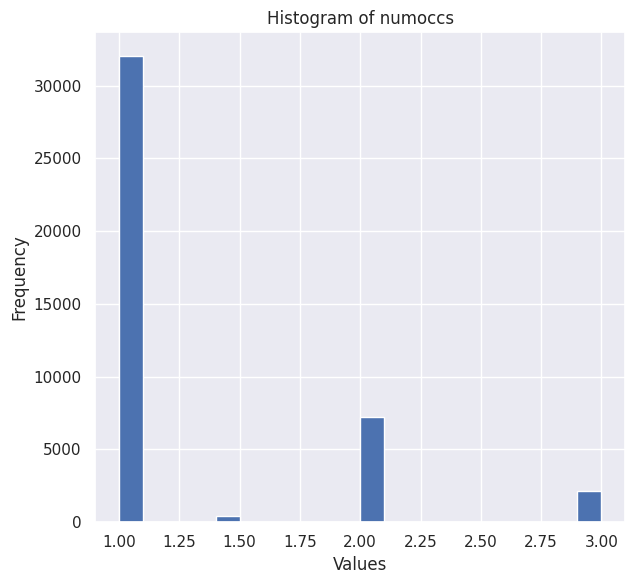

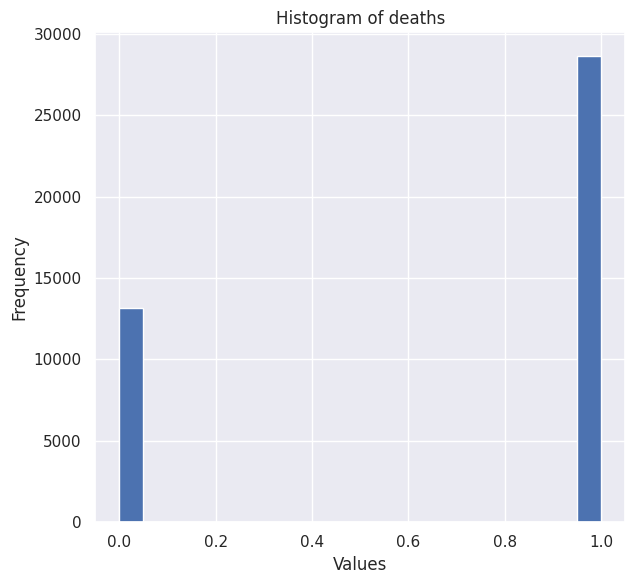

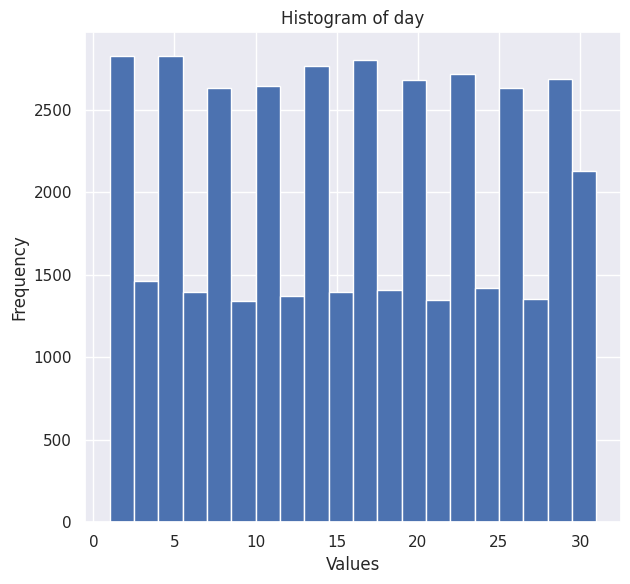

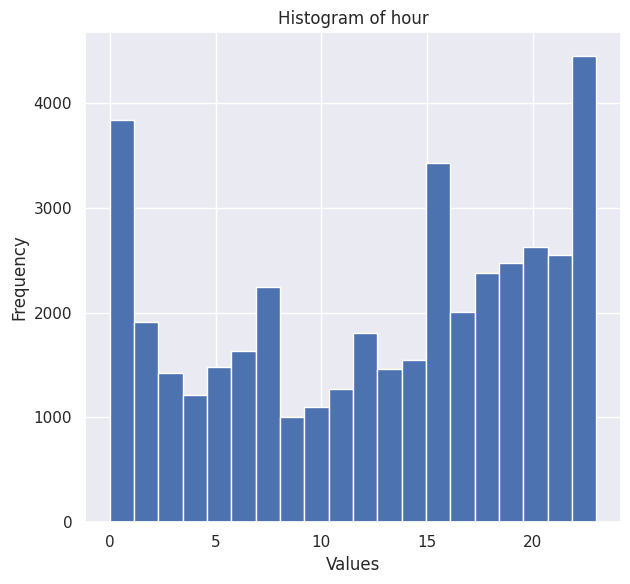

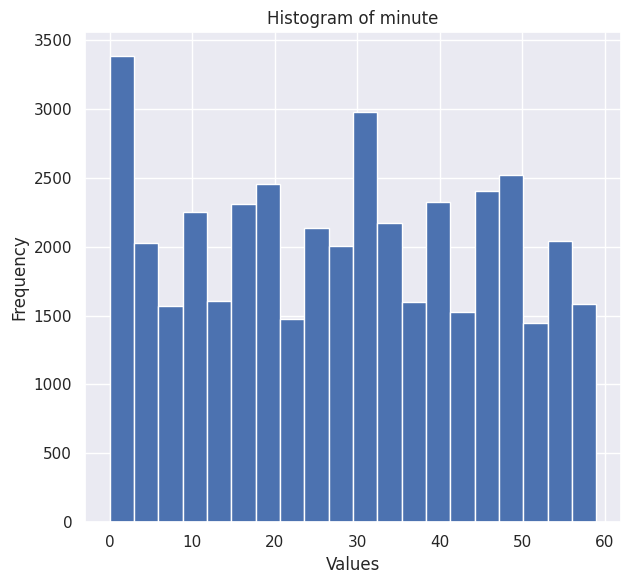

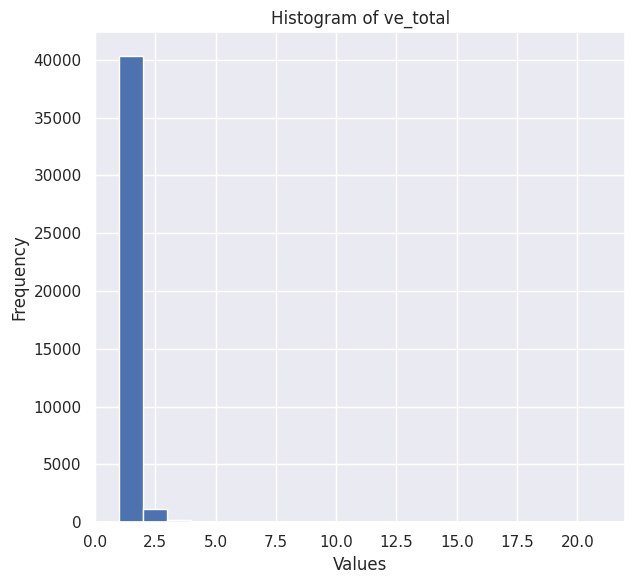

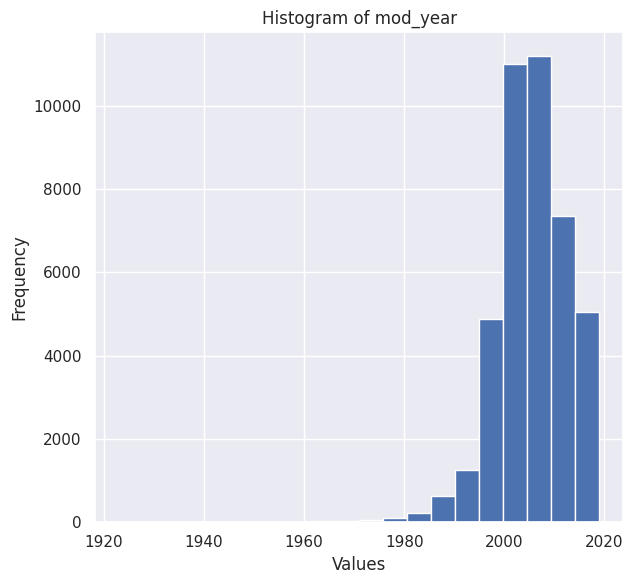

In [75]:
#some Histograms for the numerical clumns
for col in numeric_cols(removeOutliers):
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(removeOutliers[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

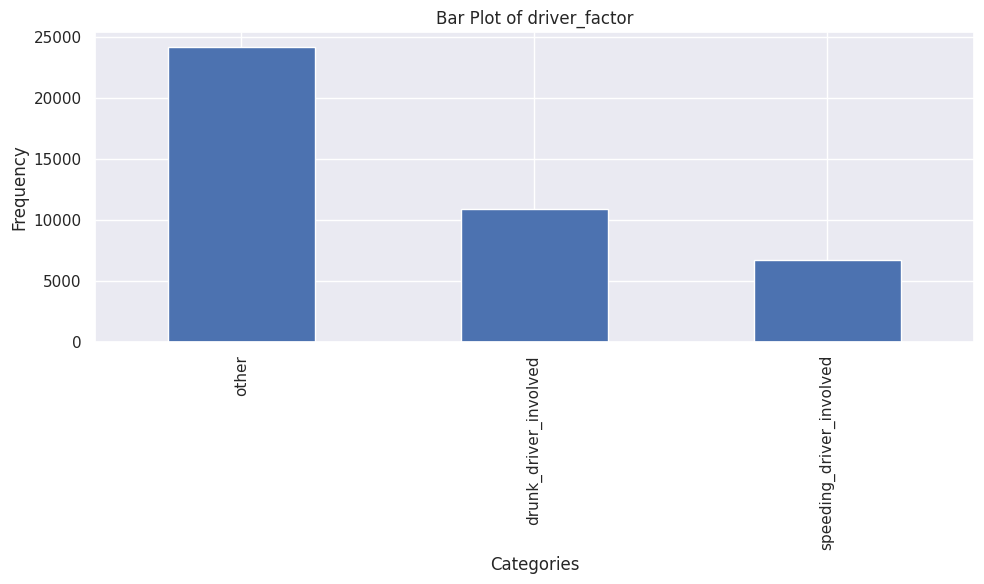

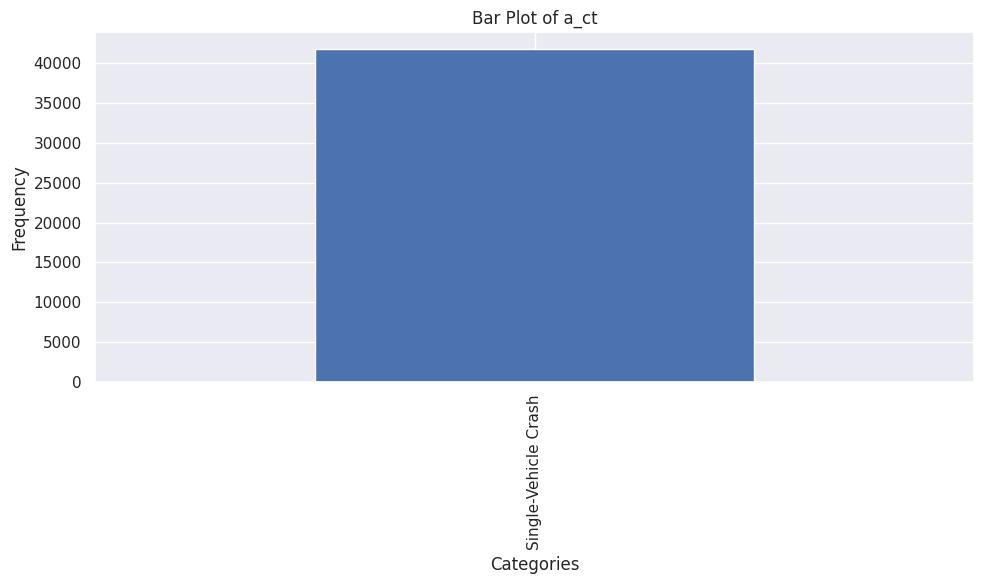

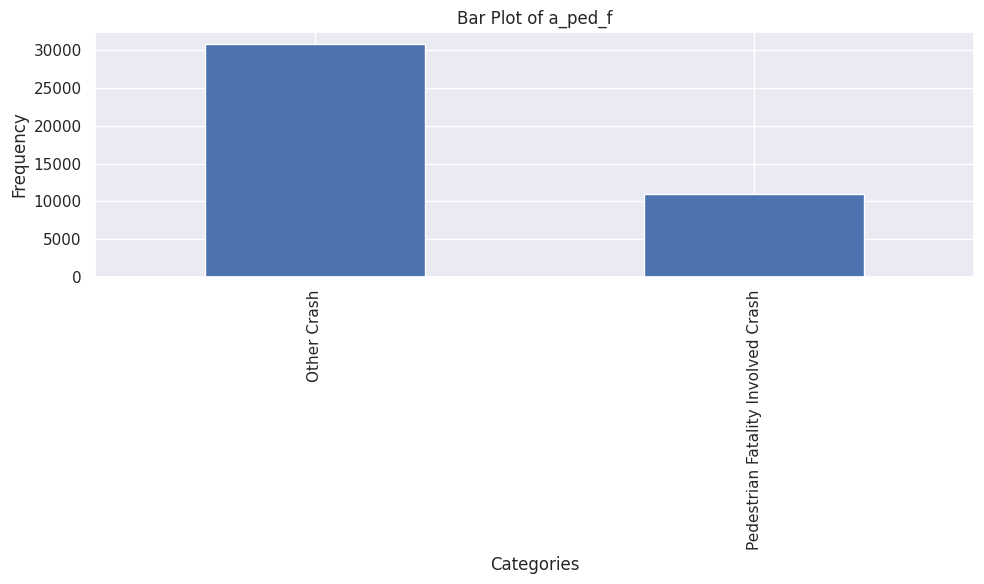

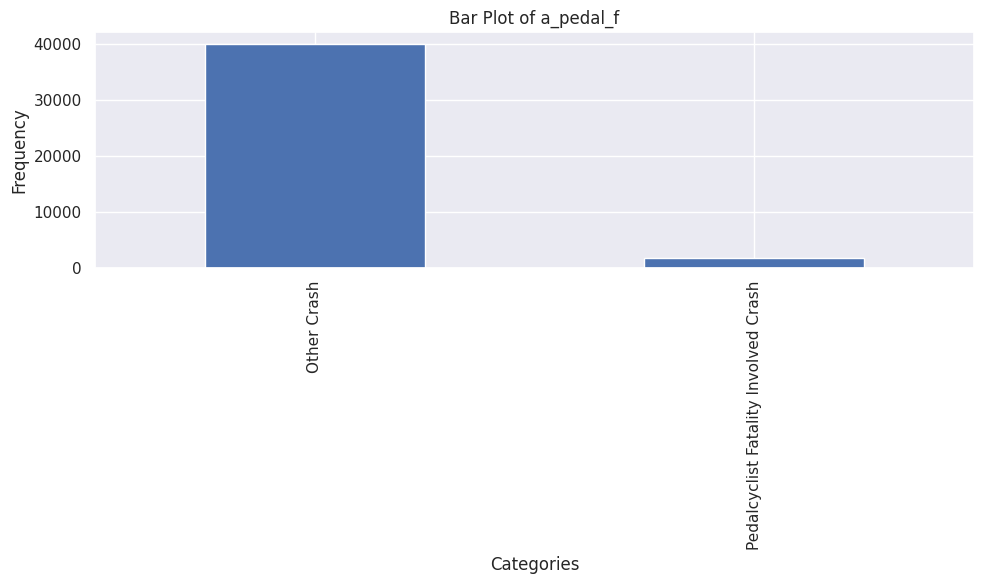

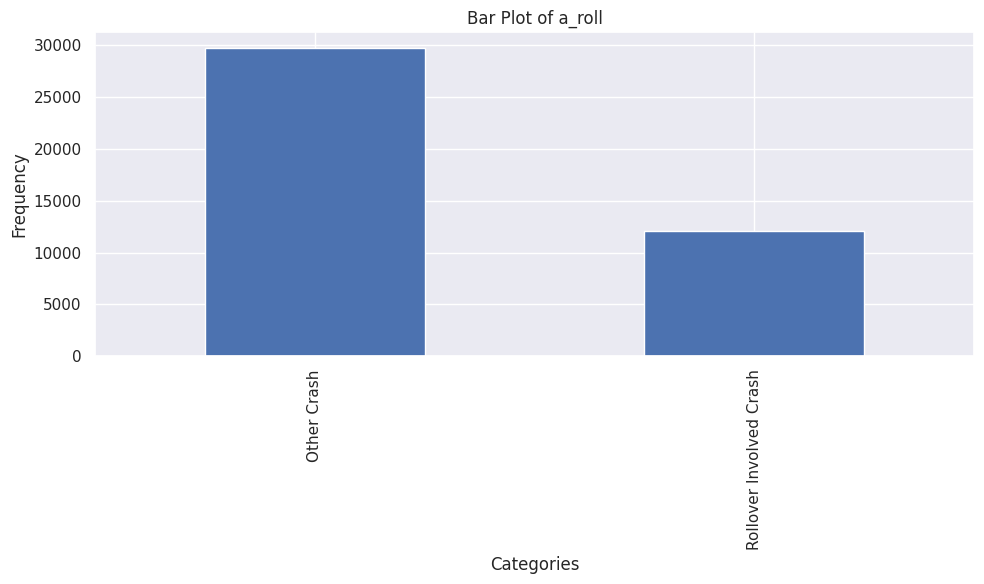

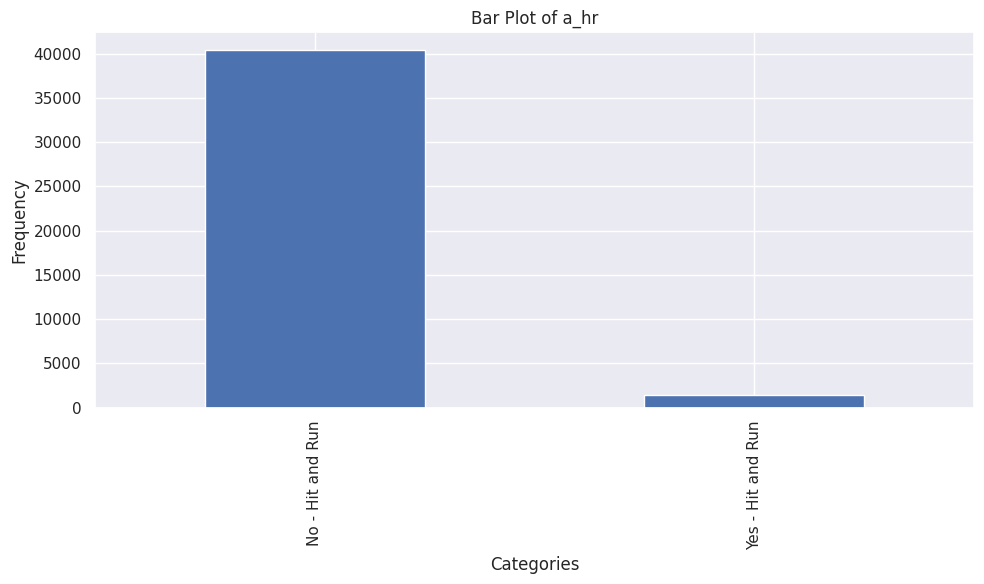

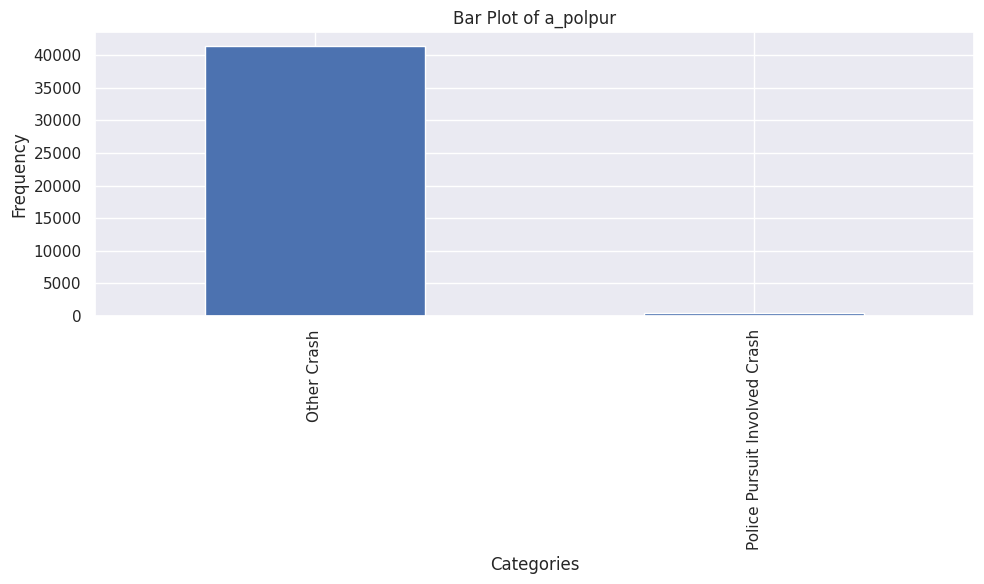

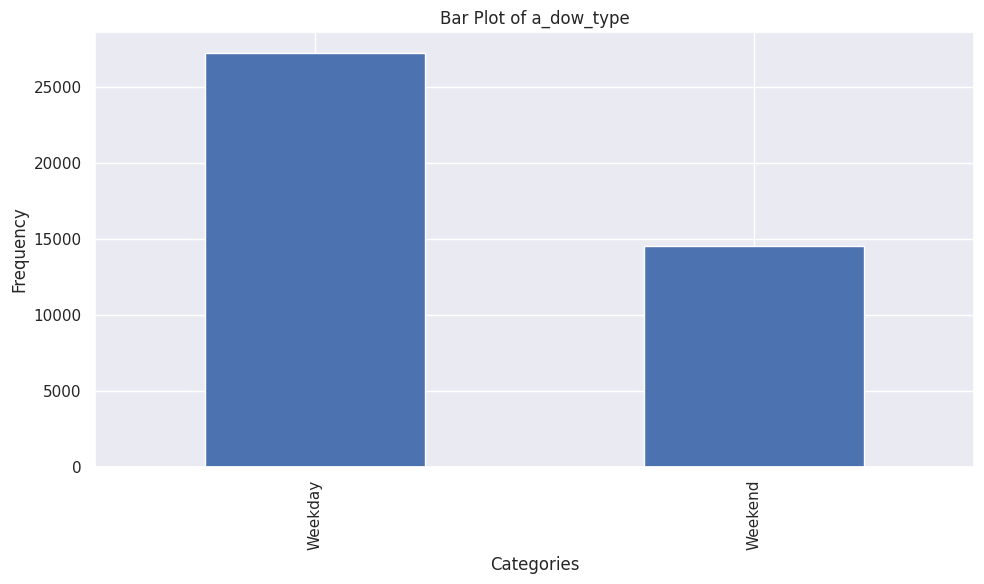

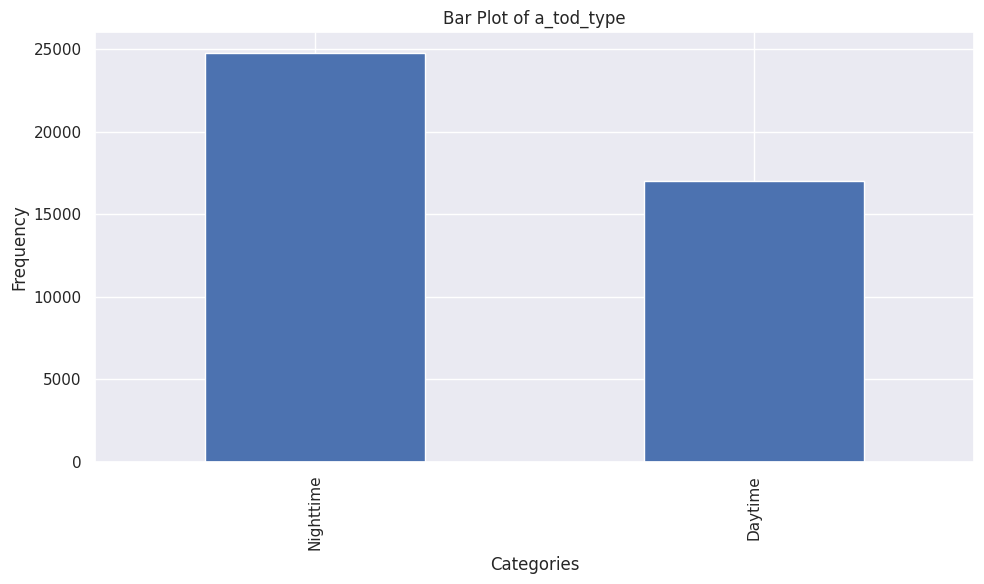

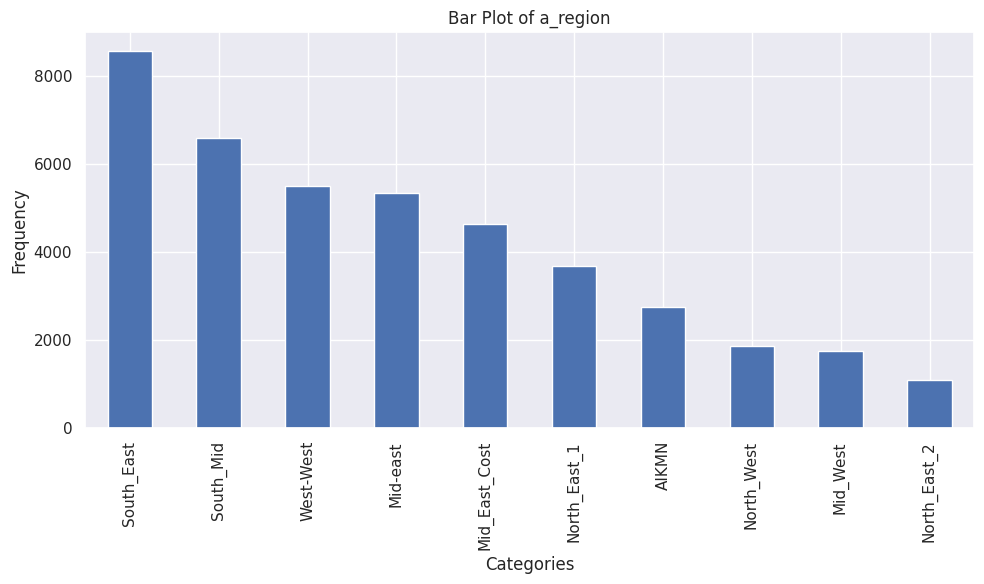

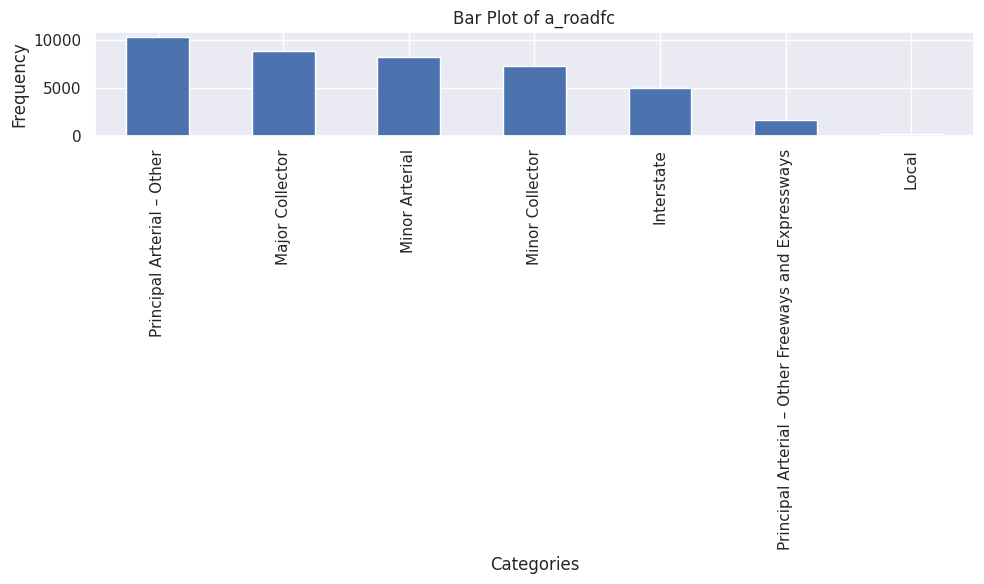

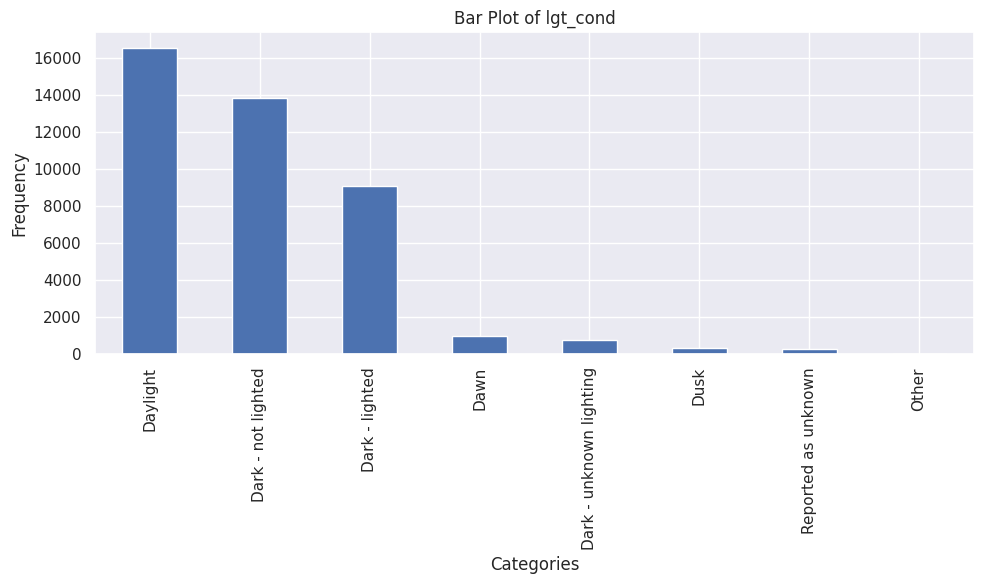

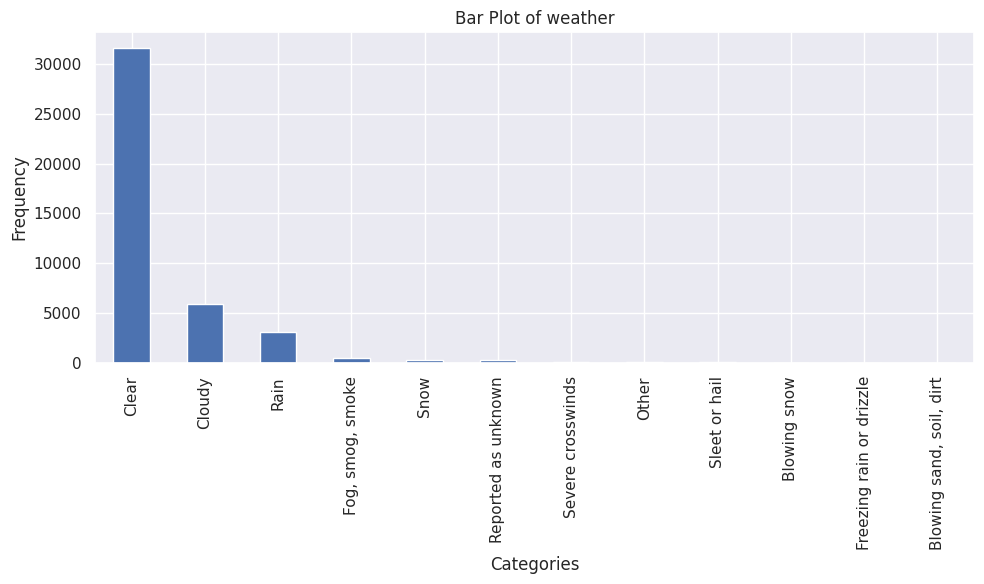

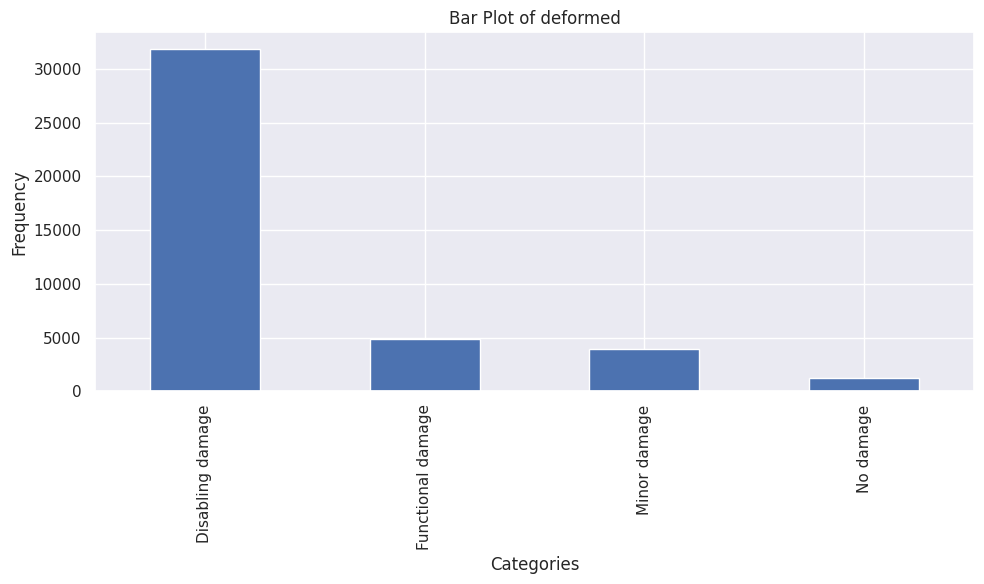

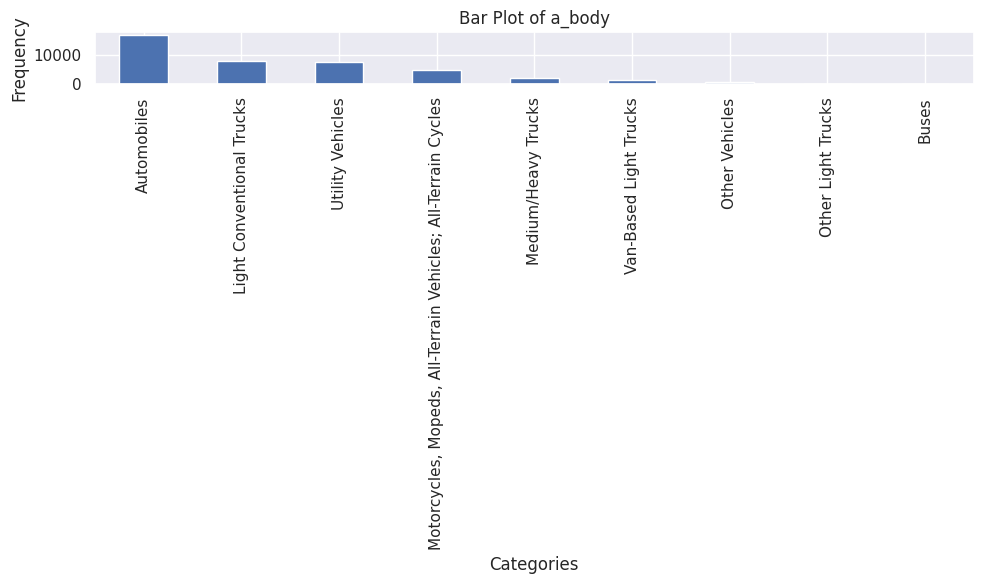

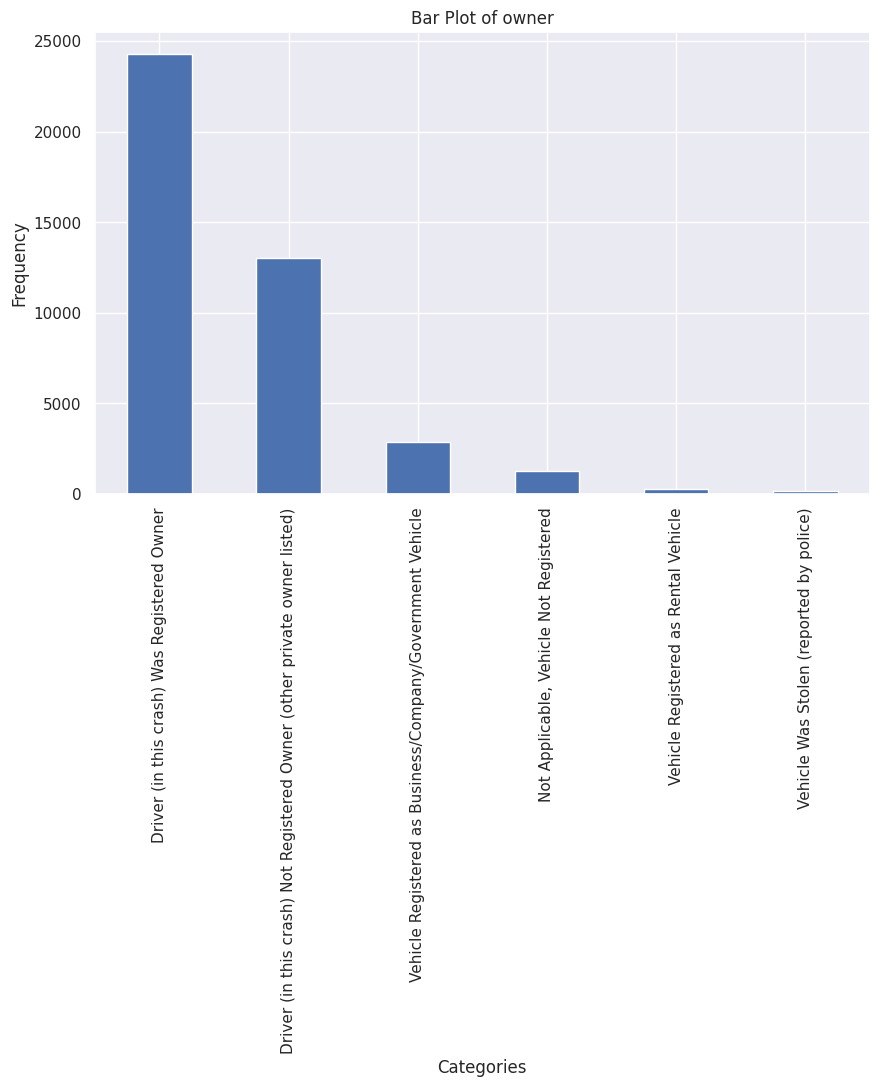

In [76]:
#Create bar plots for categorical columns
for col in category_columns(removeOutliers):
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = removeOutliers[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


## **Exploratory Data Analysis (EDA)**

#### **Number of Accidents by Month Plot**

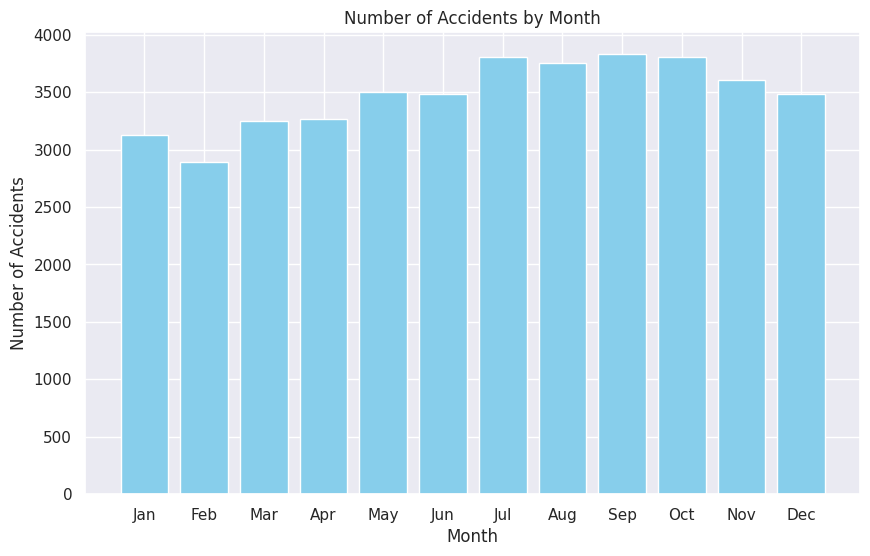

   Month  Number of Accidents
9    Sep                 3830
10   Oct                 3808
7    Jul                 3805
8    Aug                 3758
11   Nov                 3606
5    May                 3505
6    Jun                 3488
12   Dec                 3487
4    Apr                 3263
3    Mar                 3252
1    Jan                 3125
2    Feb                 2892


In [77]:
#Grouping the data by month and count the occurrences
month_counts = removeOutliers['month'].value_counts().sort_index()
 #Defining months as labels for the x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#Bar chart
plt.figure(figsize=(10, 6))
plt.bar(months, month_counts, color ='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Month')
plt.show()
#DataFrame from the month_counts and months
monthsDF = pd.DataFrame({'Month': months, 'Number of Accidents': month_counts})
# Display the table
print(monthsDF.sort_values(by='Number of Accidents', ascending=False))

**Based on the data, the top three months with the highest number of accidents are September, October, and July. On the other hand, the top three months with the lowest number of accidents are February, January, and March.**

#### **Number of Accidents by Day Type**

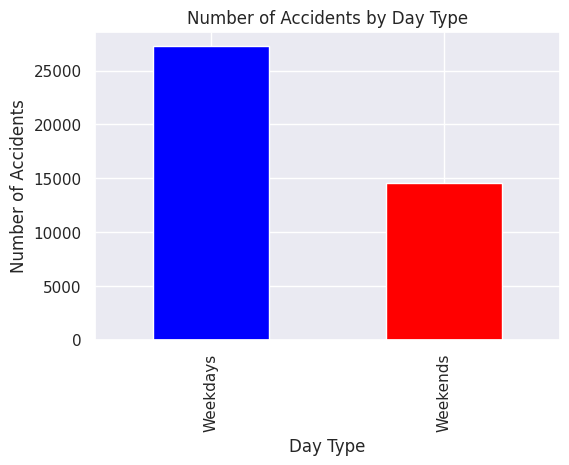

         Number of Accidents
Weekday                27255
Weekend                14564


In [78]:
#The count the occurrences of weekdays and weekends
dow_type_counts = removeOutliers['a_dow_type'].value_counts()
DayType=['Weekday','Weekend']
#Bar plot
plt.figure(figsize=(6, 4))
dow_type_counts.plot(kind='bar', color=['blue', 'red'])
plt.xlabel('Day Type')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day Type')
plt.xticks([0, 1], ['Weekdays', 'Weekends'])
plt.show()
#DataFrame from the dow_type_counts
monthsDF = pd.DataFrame({'Number of Accidents': dow_type_counts})
# Display the table
print(monthsDF.sort_values(by='Number of Accidents', ascending=False))

**The data indicates that there were 26,986 accidents on weekdays and 14,411 accidents on weekends.**

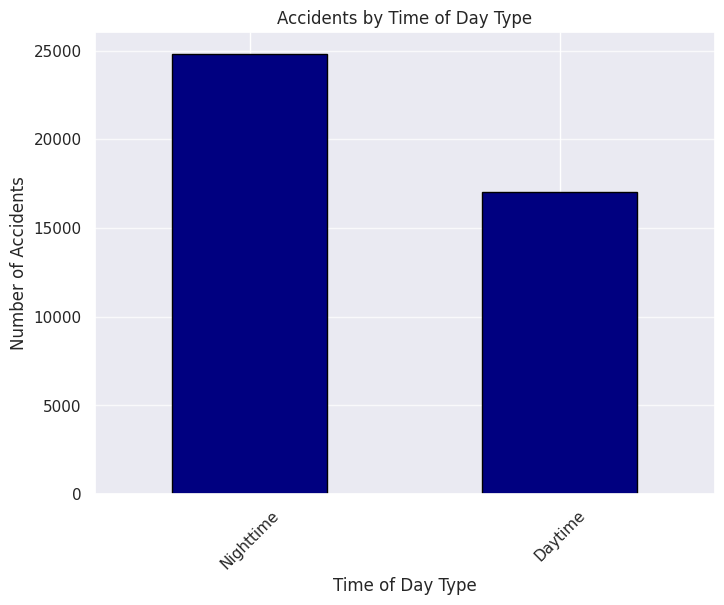

In [79]:
# the count of the Time of day
a_tod_type_count = removeOutliers['a_tod_type'].value_counts()

#bar plot
plt.figure(figsize=(8, 6))
a_tod_type_count.plot(kind='bar', color='navy', edgecolor='black')
plt.xlabel('Time of Day Type')
plt.ylabel('Number of Accidents')
plt.title('Accidents by Time of Day Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()


**From the box plot, we can observe that the majority of accidents occur during nighttime.**

#### **Correlation Matrix**

In [80]:
# Calculate the correlation matrix
correlation_matrix = removeOutliers.corr()
# Remove NaN values from the correlation matrix
correlation_matrix = correlation_matrix.dropna(axis=1, how='all').dropna(axis=0, how='all')
correlation_matrix

,u_id,month,age,numoccs,deaths,day,hour,minute,ve_total,mod_year
u_id,1.000000,-0.004040,-0.000623,0.005357,0.005632,-0.000981,0.006349,-0.006699,-0.010318,-0.001616
month,-0.004040,1.000000,0.001333,-0.011678,-0.020710,0.010416,0.006099,-0.001852,-0.002892,0.024818
age,-0.000623,0.001333,1.000000,-0.147930,-0.004113,-0.002423,0.091785,0.001185,-0.002214,-0.007316
numoccs,0.005357,-0.011678,-0.147930,1.000000,0.032501,0.003034,0.017461,-0.001404,-0.012800,0.000507
deaths,0.005632,-0.020710,-0.004113,0.032501,1.000000,0.002877,-0.135317,-0.012454,0.006684,-0.155340
day,-0.000981,0.010416,-0.002423,0.003034,0.002877,1.000000,0.002654,-0.003264,-0.006120,0.008316
hour,0.006349,0.006099,0.091785,0.017461,-0.135317,0.002654,1.000000,0.016016,-0.023422,-0.016888
minute,-0.006699,-0.001852,0.001185,-0.001404,-0.012454,-0.003264,0.016016,1.000000,0.004430,-0.002151
ve_total,-0.010318,-0.002892,-0.002214,-0.012800,0.006684,-0.006120,-0.023422,0.004430,1.000000,0.020295
mod_year,-0.001616,0.024818,-0.007316,0.000507,-0.155340,0.008316,-0.016888,-0.002151,0.020295,1.000000


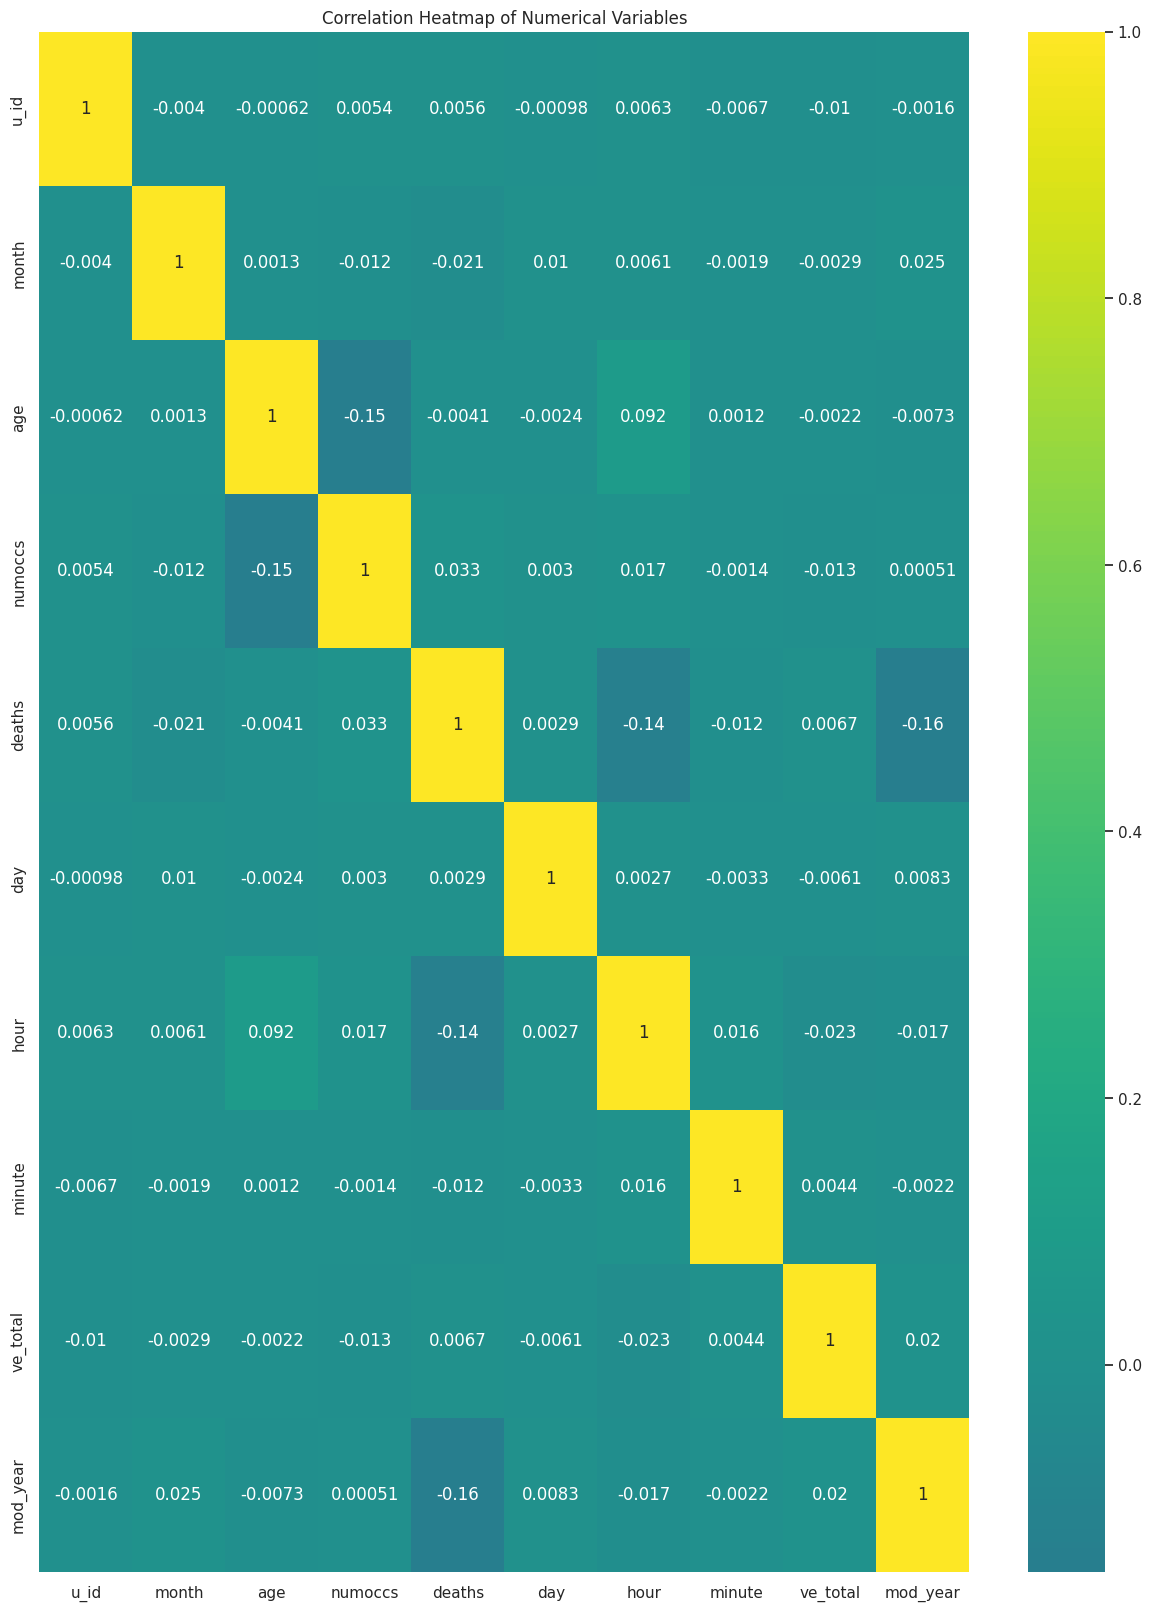

In [81]:
# Create a heatmap
plt.figure(figsize=(15, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

**The correlations in the matrix suggest that the number of deaths is primarily influenced by the number of motor vehicle occupants and, to a lesser extent, by the month of the event. The other variables appear to have weak or minimal associations with the number of deaths.**

Build TruncatedSVD Plot to understand how separated each of the targets are


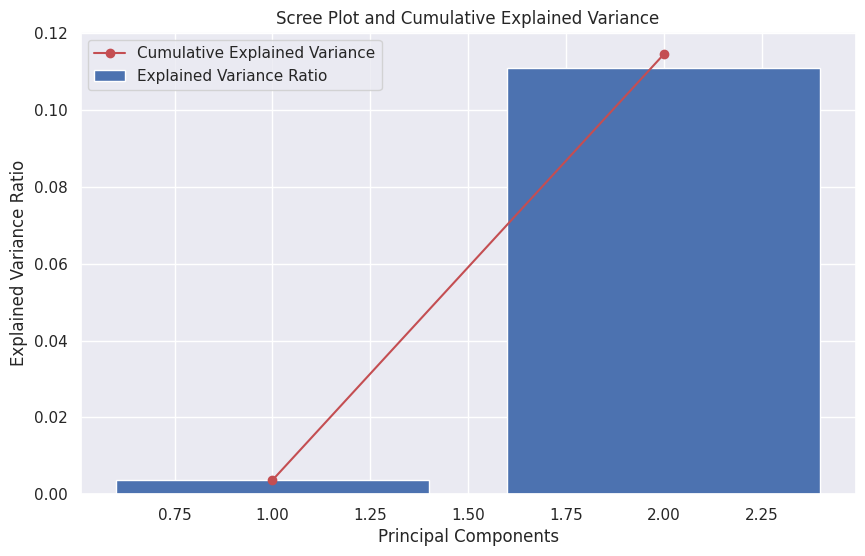

In [82]:
# Drop the target column and store as X

X_1 = removeOutliers.drop(columns = ['u_id','driver_factor'])
cat_cols = category_columns(X_1)
num_cols = numeric_cols(X_1)
# One-hot encode categorical columns
transformers = [
    ('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(), num_cols)
]
preprocessor = ColumnTransformer(transformers, remainder='passthrough')
X_processed = preprocessor.fit_transform(X_1)

# Perform PCA
svd = TruncatedSVD()
X_scd = svd.fit_transform(X_processed)

# Scree plot
# Explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='r', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.legend()
plt.show()

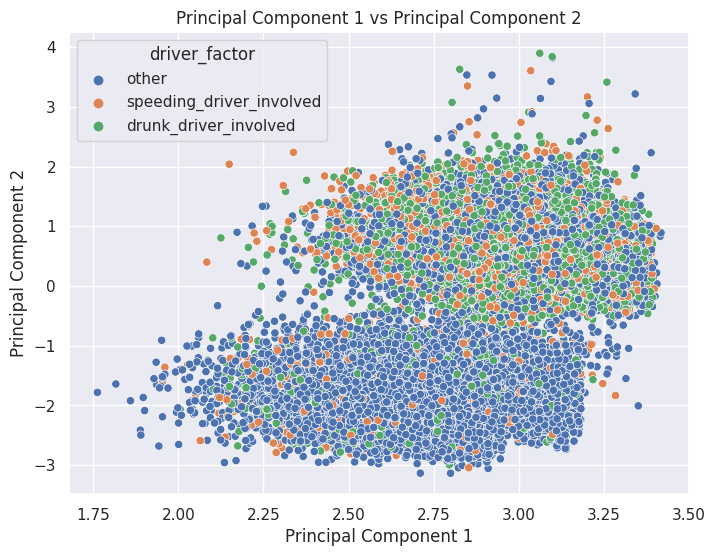

In [83]:
# Visualize the first few principal components)
legend_labels = []
num_components_to_visualize = min(X_scd.shape[1], 2)  # To make sure you don't exceed the number of components
for i in range(num_components_to_visualize - 1):  # -1 because we are visualizing i and i+1
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = X_scd[:, i], y = X_scd[:, i+1], hue = removeOutliers['driver_factor'])
    legend_labels.append(f'P{i+1}')
    plt.xlabel(f'Principal Component {i+1}')
    plt.ylabel(f'Principal Component {i+2}')
    plt.title(f'Principal Component {i+1} vs Principal Component {i+2}')
   # plt.legend(FARS['driver_factor'])
    plt.show()

Given this plot of the 2 components we can see that the data is not linearly sepraraby and we will most likley need to use a NN or Boosting model to assist with the complexity of this pattern



##**Models**

### **Build a Base Logistic regression model**
I want to know how skewed the model is going to perform with unbalanced data, as well how overfit it will be because of the amount of features

In [84]:
# split data inot X and y
X = removeOutliers.drop(columns = ['u_id','driver_factor'])
y = removeOutliers[['driver_factor']]
# split data into training, testing and validation sets, split the data 60% training, 20% validation, 20% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [85]:
# Create a ColumnTransformer for preprocessing
transformers_log = [
    ('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(), num_cols)
]

preprocessor_log = ColumnTransformer(transformers, remainder='passthrough')

# Create a pipeline with standard scaler and logistic regression
create_log_pipeline = make_pipeline(preprocessor, LogisticRegression(random_state=42))
create_log_pipeline.fit(X_train, y_train)

# Predictions on training and validation sets
predictions_train = create_log_pipeline.predict(X_train)
predictions_val = create_log_pipeline.predict(X_val)
# Predictions on testing set
predictions_test = create_log_pipeline.predict(X_test)

# Classification reports for training and validation sets
log_train_report = classification_report(y_train, predictions_train)
log_val_report = classification_report(y_val, predictions_val)
# Classification report for testing set
log_test_report = classification_report(y_test, predictions_test)
print("Training Set Classification Report:")
print(log_train_report)

print("\nValidation Set Classification Report:")
print(log_val_report)

print("\nTesting Set Classification Report:")
print(log_test_report)

Training Set Classification Report:
                          precision    recall  f1-score   support

   drunk_driver_involved       0.56      0.62      0.59      6539
                   other       0.74      0.85      0.79     14559
speeding_driver_involved       0.51      0.15      0.23      3993

                accuracy                           0.68     25091
               macro avg       0.60      0.54      0.54     25091
            weighted avg       0.65      0.68      0.65     25091


Validation Set Classification Report:
                          precision    recall  f1-score   support

   drunk_driver_involved       0.54      0.61      0.58      2121
                   other       0.74      0.84      0.79      4867
speeding_driver_involved       0.53      0.14      0.23      1376

                accuracy                           0.67      8364
               macro avg       0.60      0.53      0.53      8364
            weighted avg       0.65      0.67      0.64      8

In [86]:
# run this for the bayes search to run
!pip install scikit-optimize

In [87]:
FARS_lgbm = removeOutliers
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels to numeric values
FARS_lgbm['encoded_driver_factor'] = label_encoder.fit_transform(FARS_lgbm['driver_factor'])

In [88]:
#:1 = Other, 0=drunk_driver_involved ,2= speeding_driver_involved
FARS_lgbm.encoded_driver_factor.value_counts()

1    24168
0    10916
2     6735
Name: encoded_driver_factor, dtype: int64

In [89]:
FARS_lgbm.driver_factor.value_counts()
# Note :
#:1 = Other, 0=drunk_driver_involved ,2= speeding_driver_involved

other                       24168
drunk_driver_involved       10916
speeding_driver_involved     6735
Name: driver_factor, dtype: int64

### **XGBOOST(Machine)**

In [90]:
# split data inot X and y
X_lgbm = FARS_lgbm.drop(columns = ['u_id','driver_factor', 'encoded_driver_factor'])
y_lgbm = FARS_lgbm[['encoded_driver_factor']]
# split data into training, testing and validation sets, split the data 60% training, 20% validation, 20% testing
X_train_lgbm, X_temp_lgbm, y_train_lgbm, y_temp_lgbm = train_test_split(X_lgbm, y_lgbm, test_size=0.4, random_state=42)
X_val_lgbm, X_test_lgbm, y_val_lgbm, y_test_lgbm = train_test_split(X_temp_lgbm, y_temp_lgbm, test_size=0.5, random_state=42)
# Add scaler
standard_scaler_lgbm = StandardScaler(with_mean=False)

# Make model
lgbm_model = LGBMClassifier(random_state = 42)

# Use select best k to get the top 10 features
k_10 = 10
select_best_k = SelectKBest(score_func=f_classif, k=k_10)

# Make pipeline for LightGBM
transformers_lgbm = [
    ('cat', OneHotEncoder(), cat_cols),
    ('num', StandardScaler(),  num_cols)
]

preprocessor_lgbm = ColumnTransformer(transformers_lgbm, remainder='passthrough')
lgbm_model = LGBMClassifier(random_state=42)
select_best_k = SelectKBest(score_func=f_classif, k=10)

# Apply SMOTE to training data within the pipeline
smote = SMOTE(sampling_strategy="minority", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(
    preprocessor_lgbm.fit_transform(X_train_lgbm), y_train_lgbm
)

lgbm_pipeline = make_pipeline(
    select_best_k,
    lgbm_model
)

# Fit the pipeline on resampled training data
lgbm_pipeline.fit(X_train_resampled, y_train_resampled)

# # Make parameter search space for Bayesian optimization
param_space = {
    'lgbmclassifier__max_depth': (2, 4, 6),
    'lgbmclassifier__learning_rate': (.001, 0.01, 1.00),
    'lgbmclassifier__n_estimators': (50, 100, 150),
    'lgbmclassifier__num_leaves': (10, 20, 30, 40)
}

# Create BayesSearchCV with cross-validation
bayes_search = BayesSearchCV(
    estimator=lgbm_pipeline,
    search_spaces=param_space,
    n_iter=50,  # Number of iterations for Bayesian optimization
    cv=5,
    n_jobs=2,
    random_state=42
)

# Fit the BayesSearchCV
bayes_search.fit(X_train_resampled, y_train_resampled)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 35657, number of used features: 10
[LightGBM] [Info] Start training from score -1.696161
[LightGBM] [Info] Start training from score -0.895736
[LightGBM] [Info] Start training from score -0.895736
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003953 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1957
[LightGBM] [Info] Number of data points in the train set: 35657, number of used features: 10
[LightGBM] [Info] Start training from score -1.696161
[LightGBM] [Info] Start training from score -0.895736
[LightGBM] [Info] 

BayesSearchCV(cv=5,
              estimator=Pipeline(steps=[('selectkbest', SelectKBest()),
                                        ('lgbmclassifier',
                                         LGBMClassifier(random_state=42))]),
              n_jobs=2, random_state=42,
              search_spaces={'lgbmclassifier__learning_rate': (0.001, 0.01,
                                                               1.0),
                             'lgbmclassifier__max_depth': (2, 4, 6),
                             'lgbmclassifier__n_estimators': (50, 100, 150),
                             'lgbmclassifier__num_leaves': (10, 20, 30, 40)})

In [91]:
# get best model
best_model = bayes_search.best_estimator_
best_parameters = bayes_search.best_params_

# Make predictions on the training and test sets
train_pred = best_model.predict(X_train_resampled)
# Apply preprocessing to testing data
X_test_preprocessed = preprocessor_lgbm.transform(X_test_lgbm)
# Apply preprocessing to validation data
X_val_preprocessed = preprocessor_lgbm.transform(X_val_lgbm)
# Make predictions on the preprocessed testing data
test_pred = lgbm_pipeline.predict(X_test_preprocessed)
# Make predictions on the preprocessed testing data
val_pred = lgbm_pipeline.predict(X_val_preprocessed)

# Build the confusion matrix for both training and testing
cm_lgbm_train = confusion_matrix(y_train_resampled, train_pred)
cm_lgbm_test = confusion_matrix(y_test_lgbm, test_pred)

# Build CM plots
train_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_train, display_labels=best_model.named_steps['lgbmclassifier'].classes_)
test_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_lgbm_test, display_labels=best_model.named_steps['lgbmclassifier'].classes_)

# Build classification reports
train_lgbm_report = classification_report(y_train_resampled, train_pred)
val_lgbm_report = classification_report(y_val_lgbm, val_pred)
test_lgbm_report = classification_report(y_test_lgbm, test_pred)

# Print out the reports
print(f'Best Hyperparameters {best_parameters}')
print('\n--------Training classification report--------------')
print(train_lgbm_report)
print('\n--------Validation classification report--------------')
print(val_lgbm_report)
print('--------Testing Classification Report-----------')
print(test_lgbm_report)

Best Hyperparameters OrderedDict([('lgbmclassifier__learning_rate', 1.0), ('lgbmclassifier__max_depth', 2), ('lgbmclassifier__n_estimators', 150), ('lgbmclassifier__num_leaves', 10)])

--------Training classification report--------------
              precision    recall  f1-score   support

           0       0.54      0.64      0.59      6539
           1       0.72      0.82      0.77     14559
           2       0.93      0.72      0.81     14559

    accuracy                           0.75     35657
   macro avg       0.73      0.73      0.72     35657
weighted avg       0.77      0.75      0.75     35657


--------Validation classification report--------------
              precision    recall  f1-score   support

           0       0.53      0.62      0.57      2121
           1       0.73      0.80      0.77      4867
           2       0.33      0.14      0.19      1376

    accuracy                           0.65      8364
   macro avg       0.53      0.52      0.51      8364

### **Random Forest**

In [92]:
# Make Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Create a Random Forest pipeline
rf_pipeline = make_pipeline(
    select_best_k,
    rf_model
)

# Apply SMOTE to training data within the Random Forest pipeline
X_train_resampled_rf, y_train_resampled_rf = smote.fit_resample(
    preprocessor_lgbm.fit_transform(X_train_lgbm), y_train_lgbm
)

# Fit the Random Forest pipeline on resampled training data
rf_pipeline.fit(X_train_resampled_rf, y_train_resampled_rf)


Pipeline(steps=[('selectkbest', SelectKBest()),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [93]:
# Make predictions on the training, validation, and test sets using the Random Forest pipeline
train_pred_rf = rf_pipeline.predict(X_train_resampled_rf)
val_pred_rf = rf_pipeline.predict(X_val_preprocessed)
test_pred_rf = rf_pipeline.predict(X_test_preprocessed)

# Build the confusion matrix for training, validation, and testing
cm_rf_train = confusion_matrix(y_train_resampled_rf, train_pred_rf)
cm_rf_val = confusion_matrix(y_val_lgbm, val_pred_rf)
cm_rf_test = confusion_matrix(y_test_lgbm, test_pred_rf)

# Build classification reports for training, validation, and testing
train_rf_report = classification_report(y_train_resampled_rf, train_pred_rf)
val_rf_report = classification_report(y_val_lgbm, val_pred_rf)
test_rf_report = classification_report(y_test_lgbm, test_pred_rf)

# Build CM plots for training, validation, and testing
train_rf_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_rf_train, display_labels=rf_model.classes_)
val_rf_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_rf_val, display_labels=rf_model.classes_)
test_rf_cm_plots = ConfusionMatrixDisplay(confusion_matrix=cm_rf_test, display_labels=rf_model.classes_)

# Print out the reports for Random Forest
print('\n--------Random Forest Training classification report--------------')
print(train_rf_report)
print('\n--------Random Forest Validation classification report--------------')
print(val_rf_report)
print('--------Random Forest Testing Classification Report-----------')
print(test_rf_report)



--------Random Forest Training classification report--------------
              precision    recall  f1-score   support

           0       0.55      0.64      0.60      6539
           1       0.73      0.83      0.78     14559
           2       0.94      0.75      0.83     14559

    accuracy                           0.76     35657
   macro avg       0.74      0.74      0.74     35657
weighted avg       0.79      0.76      0.77     35657


--------Random Forest Validation classification report--------------
              precision    recall  f1-score   support

           0       0.52      0.61      0.56      2121
           1       0.72      0.81      0.77      4867
           2       0.34      0.10      0.15      1376

    accuracy                           0.64      8364
   macro avg       0.53      0.51      0.49      8364
weighted avg       0.61      0.64      0.61      8364

--------Random Forest Testing Classification Report-----------
              precision    recall  f1

### **Neural Networks**

In [95]:
def apply_ohe(dataset):
  category_columns_1 = category_columns(dataset)
  ohe = OneHotEncoder(sparse = False)
  ohe.fit(np.array(dataset[category_columns_1]).reshape(-1, 1))
  ohe_data = ohe.transform(np.array(dataset[category_columns_1]).reshape(-1, 1))
  new_df = pd.DataFrame(ohe_data, columns = ohe.get_feature_names_out())
  final_df = pd.concat([dataset.drop(columns = category_columns_1), new_df], axis = 1)
  return final_df

X_nn = FARS_lgbm.drop(columns = ['u_id','driver_factor', 'encoded_driver_factor'])
y_nn = FARS_lgbm[['encoded_driver_factor']]
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

X_train_enc = apply_ohe(X_train_nn)
X_test_enc = apply_ohe(X_test_nn)
X_train_enc.dropna(inplace = True)
X_test_enc.dropna(inplace = True)
# Apply standard scaling to numerical columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_enc)
X_test_scaled = scaler.transform(X_test_enc)
# flatten target variables to fit properly to the model
y_train_nn_array = y_train_nn.values.flatten()
y_test_nn_array = y_test_nn.values.flatten()


# Concatenate encoded categorical and scaled numerical features
# Apply SMOTE to oversample the minority class in training data
# smote = SMOTE(sampling_strategy='minority', random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_nn_array)

# Define preprocessing steps
num_classes = len(np.unique(y_train_nn))

nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(36, activation='relu'),
    Dense(18, activation='relu'),
    Dense(num_classes, activation='softmax')  # For multi-class classification
])

# Compile the model
nn_model.compile(optimizer=Adam(learning_rate=.001),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# # Fit and transform the training data using the preprocessor
# X_train_processed_nn = preprocessor_nn.fit_transform(X_train_nn)

# Fit the neural network model on preprocessed data
history = nn_model.fit(X_train_scaled, y_train_nn_array, epochs=50, batch_size=32, verbose=1)

# Evaluate the model on training data
train_loss, train_accuracy = nn_model.evaluate(X_train_scaled, y_train_nn_array, verbose=0)

# Print training accuracy
print("Training Accuracy:", train_accuracy)

# Evaluate the model on testing data
test_loss, test_accuracy = nn_model.evaluate(X_test_scaled, y_test_nn_array, verbose=0)

# Print testing accuracy
print("Testing Accuracy:", test_accuracy)

# Predictions on testing set
y_pred_test = nn_model.predict(X_test_scaled)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Classification report
test_classification_report = classification_report(y_test_nn_array, y_pred_test_classes)
print("Testing Classification Report:\n", test_classification_report)

Epoch 1/50
1046/1046 [==============================] - 14s 10ms/step - loss: 0.8902 - accuracy: 0.5815
Epoch 2/50
1046/1046 [==============================] - 9s 9ms/step - loss: 0.8440 - accuracy: 0.6011
Epoch 3/50
1046/1046 [==============================] - 8s 8ms/step - loss: 0.8333 - accuracy: 0.6075
Epoch 4/50
1046/1046 [==============================] - 8s 7ms/step - loss: 0.8243 - accuracy: 0.6172
Epoch 5/50
1046/1046 [==============================] - 5s 5ms/step - loss: 0.8149 - accuracy: 0.6286
Epoch 6/50
1046/1046 [==============================] - 6s 6ms/step - loss: 0.8080 - accuracy: 0.6357
Epoch 7/50
1046/1046 [==============================] - 5s 5ms/step - loss: 0.8040 - accuracy: 0.6393
Epoch 8/50
1046/1046 [==============================] - 6s 6ms/step - loss: 0.8028 - accuracy: 0.6381
Epoch 9/50
1046/1046 [==============================] - 6s 6ms/step - loss: 0.7989 - accuracy: 0.6448
Epoch 10/50
1046/1046 [==============================] - 7s 6ms/step - loss: 0.7

In [105]:
train_rf_report[2]

' '

In [98]:
import matplotlib.pyplot as plt

# Define the model names
model_names = ['LightGBM', 'Random Forest', 'Neural Network']

# Define the corresponding training and testing accuracies for each model
train_accuracies = [train_accuracy, train_rf_report['accuracy'], history.history['accuracy'][-1]]
test_accuracies = [test_accuracy, test_rf_report['accuracy'], test_classification_report['accuracy']]

# Create a figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot training accuracies
ax.plot(model_names, train_accuracies, marker='o', label='Training Accuracy')

# Plot testing accuracies
ax.plot(model_names, test_accuracies, marker='o', label='Testing Accuracy')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Training and Testing Accuracies of Different Models')

# Add legend
ax.legend()

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

TypeError: ignored

In [107]:
# gather all the accruacy scores for each model and store them in a dataframe
# Logistic regression training and testing accruacy score
# log_reg_train_acc = round(accuracy_score(y_train_1, predictions_train),2)
# log_reg_test_acc = round(accuracy_score(y_test_1, predictions_test),2)
# log_reg_cv_acc_train = cv_log_acc_train
# log_reg_cv_acc_test = cv_log_acc_test
# Get XGBoost training and testing score
lgbm_train_acc = round(accuracy_score(y_train_resampled, train_pred),2)
lgbm_test_acc = round(accuracy_score(y_test_lgbm, test_pred),2)
# Random Forest Scores
rf_train_acc = round(accuracy_score(y_train_resampled_rf, train_pred_rf),2)
rf_test_acc = round(accuracy_score(y_test_lgbm, test_pred_rf),2)
## Neural Network accruacy
nn_accuracy_tr = round(train_accuracy, 2)
nn_accuracy_te = round(test_accuracy, 2)
# build dictionary to store the models and there corresponding accruacy score
all_models = {'Models': ['LGBM ',  'Random Forest', 'Neural Network'],
              'Train_Scores': [lgbm_train_acc, rf_train_acc,
                              nn_accuracy_tr],
              'Test_Scores': [lgbm_test_acc, rf_test_acc,
                             nn_accuracy_te]
}


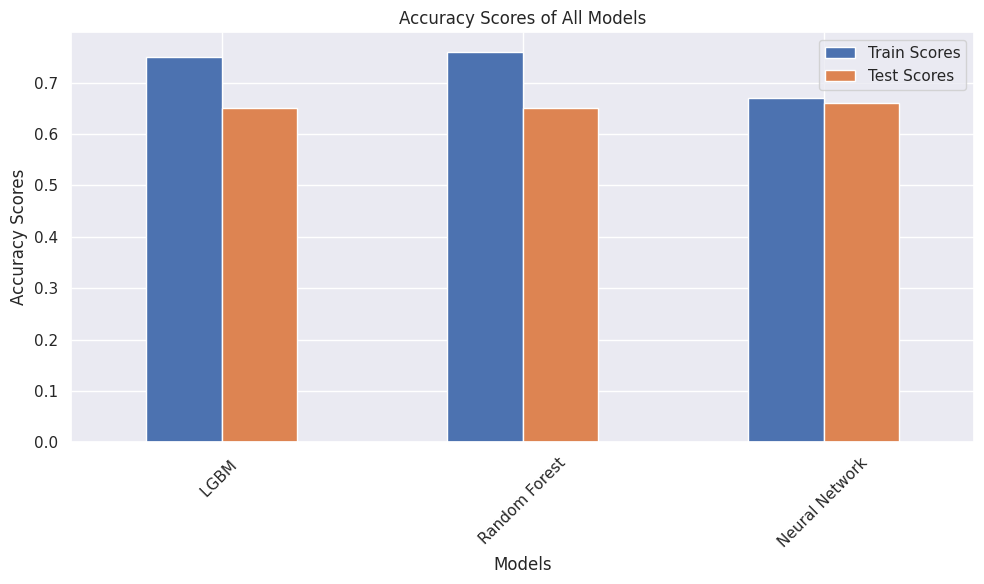

In [109]:
# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(all_models)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
scores_df.plot(kind='bar', x='Models', y=['Train_Scores', 'Test_Scores'], ax=ax)
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.title('Accuracy Scores of All Models')
plt.xticks(rotation=45)
plt.legend(['Train Scores', 'Test Scores'], loc = 'upper right')
plt.tight_layout()

# Show the plot
plt.show()